In [1]:
cd /content/drive/MyDrive/SOA Work/Nitish_work

/content/drive/MyDrive/SOA Work/Nitish_work


In [2]:
ls

DATA.csv                   hist.png         trained_model.joblib  weather_data.xls
DATA.xlsx                  imballance.py    training_data.csv
effect_of_heatwaves.ipynb  R2_RMSE_MAE.jpg  train_modal.py
final_data.xls             scaler.joblib    weather_data.ods


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
df = pd.read_excel("final_data.xls")

In [5]:
df.shape

(76, 8)

In [6]:
df.head()

,PLACE,DATE,Temp,Presure,Humidity,Wind,precipitation,afected people
0,BALASORE,2024-04-15 00:00:00,40.0,1012.0,89,17.0,0.0,1
1,Sundargarh,2024-04-15 00:00:00,40.0,1012.0,80,9.0,0.0,35
2,Mayurbhanj,2024-04-15 00:00:00,39.0,1011.0,93,6.0,0.0,7
3,ANGUL,2024-04-15 00:00:00,40.0,1012.0,89,17.0,0.0,7
4,BALASORE,2023-06-17 00:00:00,34.0,1002.0,88,6.0,0.0,2


In [7]:
# prompt: save all the above plot in drive

import matplotlib.pyplot as plt
# Save all figures to the current working directory
for fig_num in plt.get_fignums():
  plt.figure(fig_num)
  plt.savefig(f'figure_{fig_num}.png')




In [8]:
print(df.isna().sum())

PLACE             0
DATE              0
Temp              0
Presure           0
Humidity          0
Wind              0
precipitation     0
afected people    0
dtype: int64


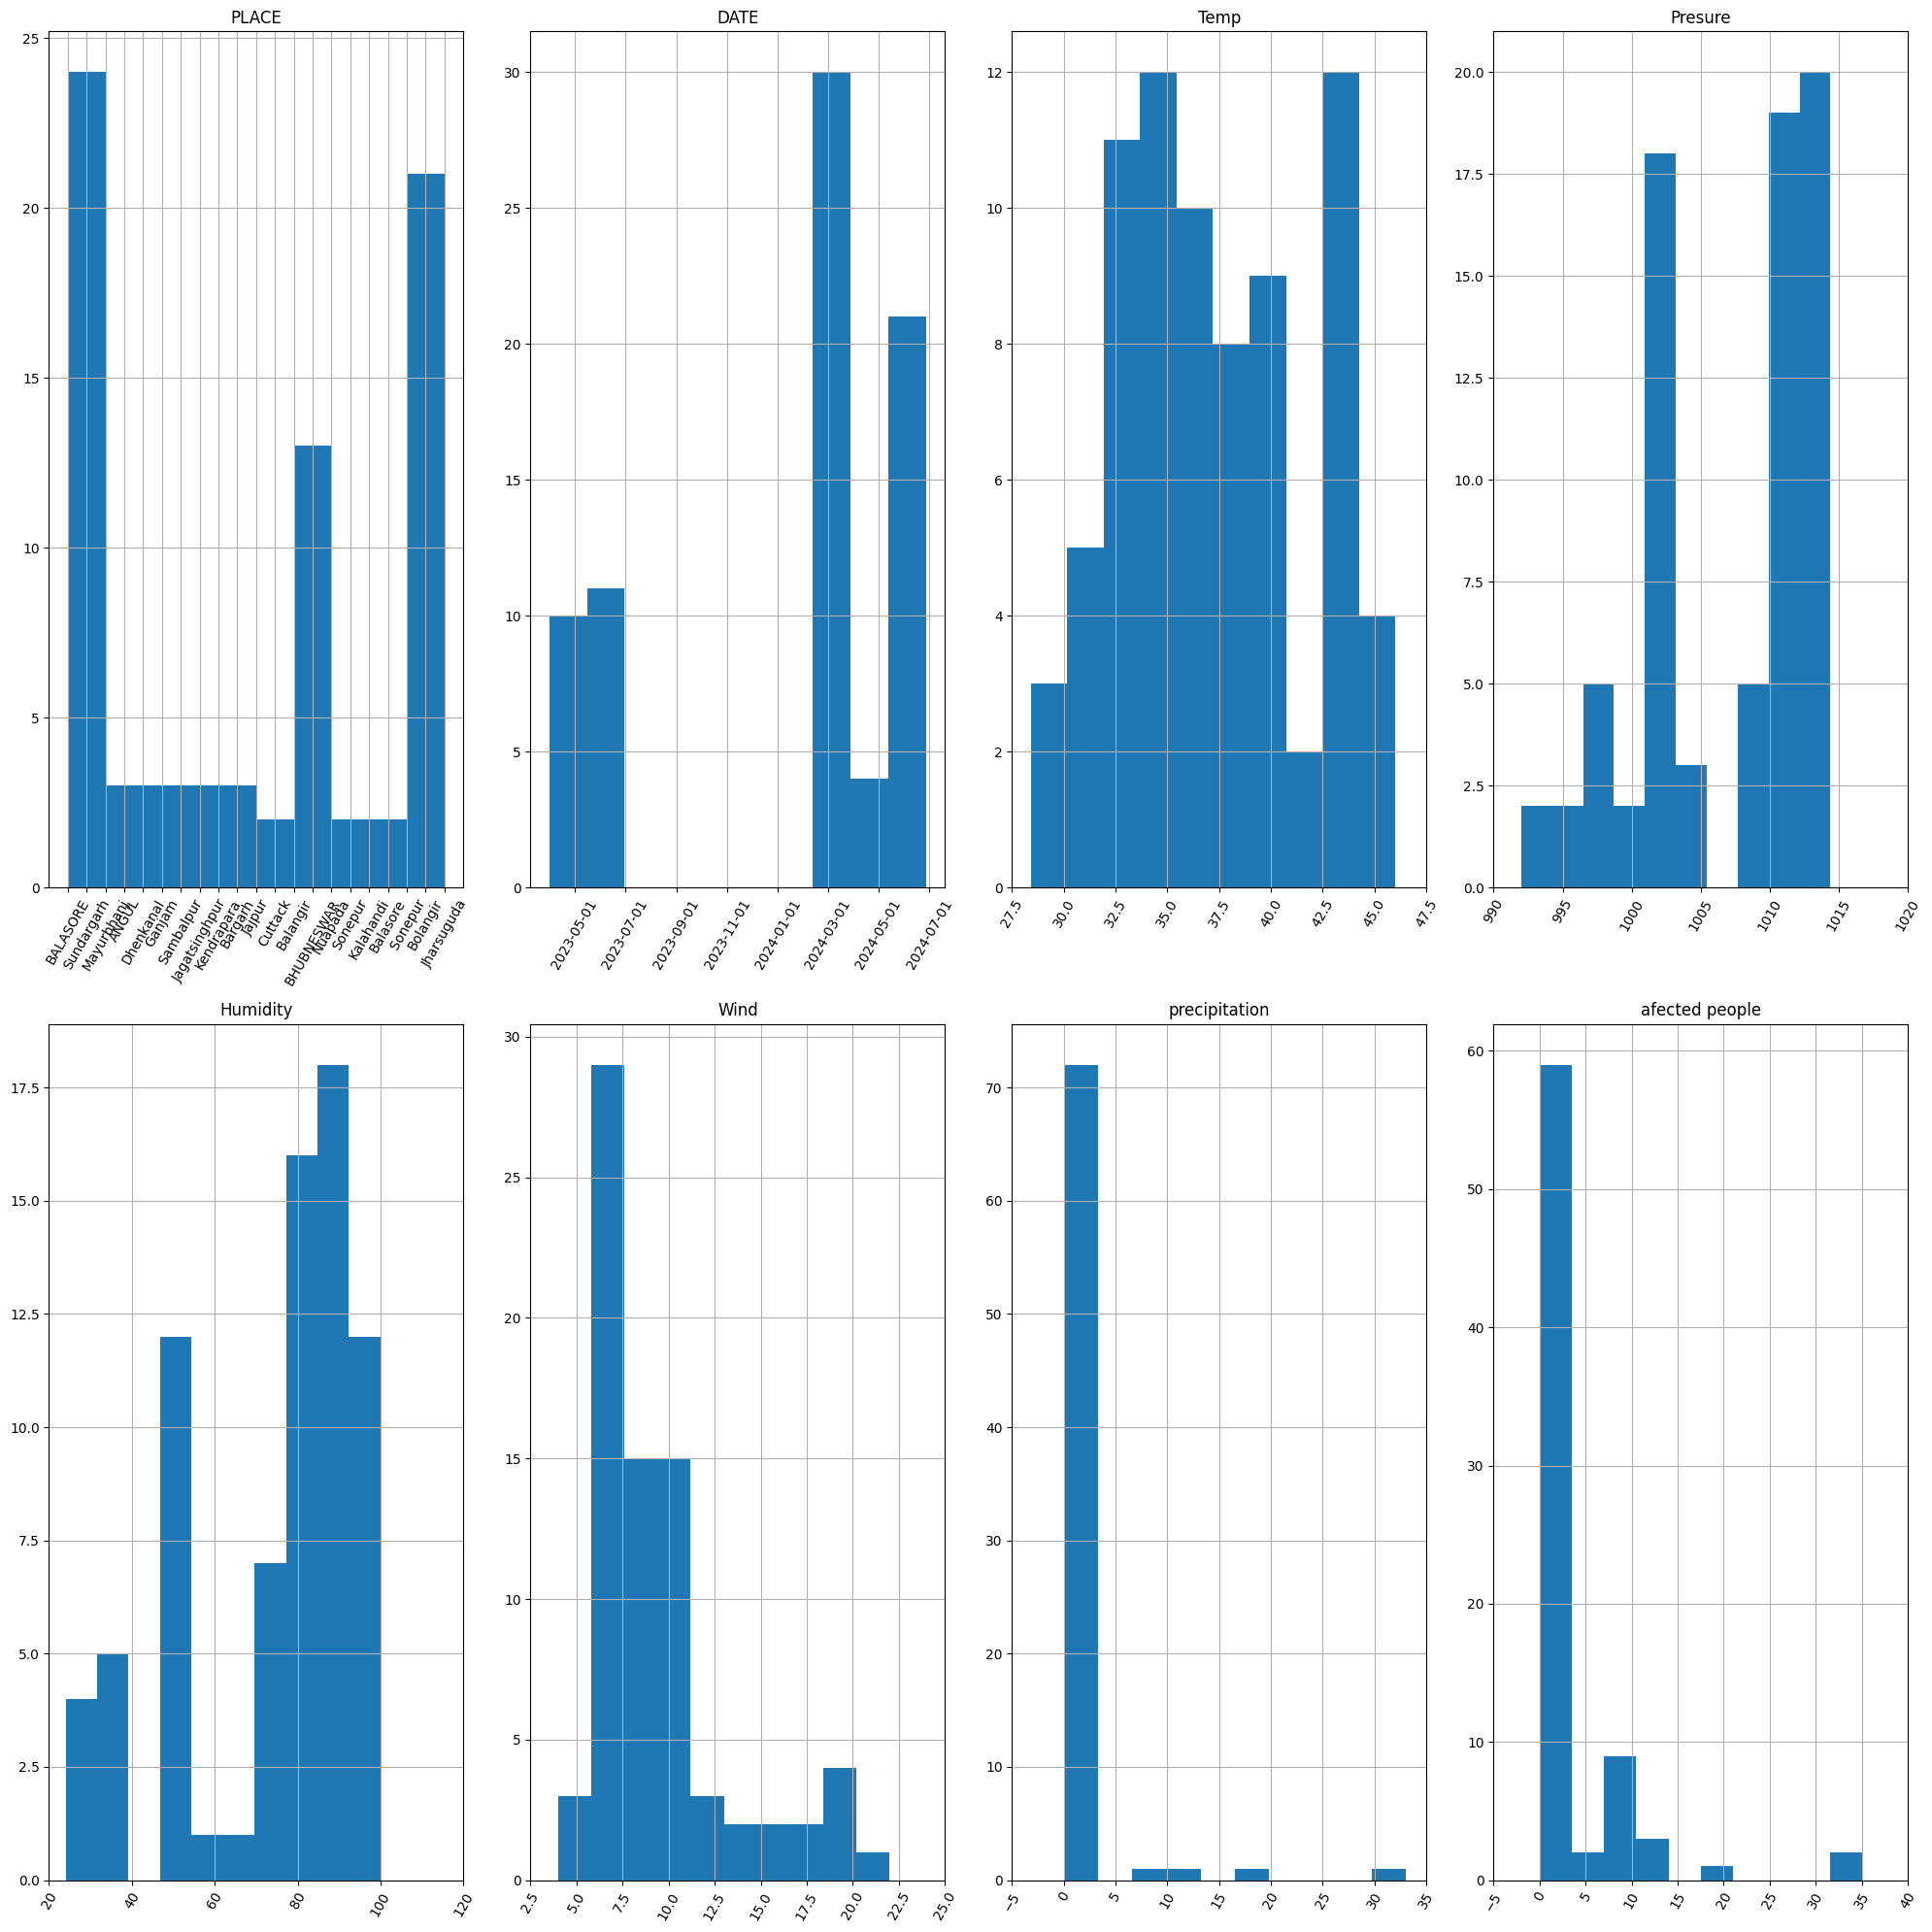

In [9]:
columns = df.columns
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 20))
axes = axes.flatten()
for idx, col in enumerate(columns):
    df[col].hist(ax=axes[idx])
    axes[idx].set_title(col)
    axes[idx].set_xticks(axes[idx].get_xticks())
    axes[idx].set_xticklabels(axes[idx].get_xticklabels(), rotation=60)
for j in range(len(columns), len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.savefig("hist.png")
plt.show()

In [10]:
drop_cols = ["PLACE","DATE"]
df1 = df.drop(columns=drop_cols, axis='columns')

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temp            76 non-null     float64
 1   Presure         76 non-null     float64
 2   Humidity        76 non-null     int64  
 3   Wind            76 non-null     float64
 4   precipitation   76 non-null     float64
 5   afected people  76 non-null     int64  
dtypes: float64(4), int64(2)
memory usage: 3.7 KB


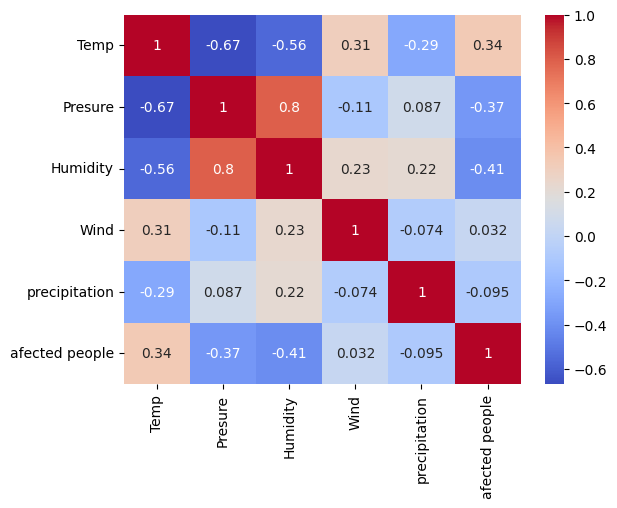

In [57]:


import matplotlib.pyplot as plt
import seaborn as sns

# Generate a heatmap of the correlations between the columns of df1
sns.heatmap(df1.corr(), annot=True, cmap='coolwarm')

# Save the heatmap to a file
plt.savefig('heatmap.png')


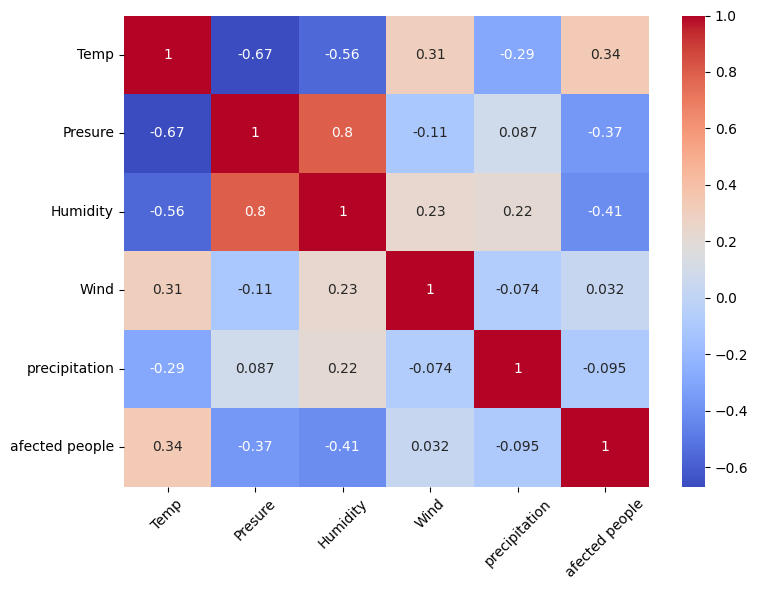

In [60]:


import matplotlib.pyplot as plt
# Increase the figure size to accommodate the longer labels
plt.figure(figsize=(8, 6))

# Generate a heatmap of the correlations between the columns of df1
sns.heatmap(df1.corr(), annot=True, cmap='coolwarm')

# Rotate the x-axis labels to prevent them from being cut off
plt.xticks(rotation=45)
plt.tight_layout()
# Save the heatmap to a file
plt.savefig('heatmap_full_labels.png')


## Data augmentation SMOGN

In [12]:
!pip install smogn

In [13]:
import smogn

In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temp            76 non-null     float64
 1   Presure         76 non-null     float64
 2   Humidity        76 non-null     int64  
 3   Wind            76 non-null     float64
 4   precipitation   76 non-null     float64
 5   afected people  76 non-null     int64  
dtypes: float64(4), int64(2)
memory usage: 3.7 KB


In [15]:
# Define the target column
target_column = 'afected people'

# Perform SMOGN to augment the data
df_augmented = smogn.smoter(data=df1, y=target_column)

r_index: 100%|##########| 16/16 [00:00<00:00, 264.43it/s]


In [27]:
df_augmented.shape

(54, 6)

# Z score normalization

In [ ]:
"""
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
normalized_data = scaler.fit_transform(df1)

"""

'\nfrom sklearn.preprocessing import StandardScaler\nscaler = StandardScaler()\nnormalized_data = scaler.fit_transform(df1)\n\n'

In [ ]:
#normalized_df = pd.DataFrame(normalized_data, columns=df1.columns)

## Part 3- split the dataset into 75% and 25%

In [19]:
from sklearn.model_selection import train_test_split

In [28]:
X = df_augmented.iloc[:, :5]
y = df_augmented.iloc[:,5]

In [29]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
Index: 54 entries, 0 to 74
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Temp           54 non-null     float64
 1   Presure        54 non-null     float64
 2   Humidity       54 non-null     float64
 3   Wind           54 non-null     float64
 4   precipitation  54 non-null     float64
dtypes: float64(5)
memory usage: 2.5 KB
None


In [30]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

## Part 4 import the models

In [31]:
# import all of them
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, HistGradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt
from sklearn.metrics import mean_absolute_error

In [32]:
# Define the models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "ElasticNet": ElasticNet(),
    "KNeighbors Regressor": KNeighborsRegressor(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "SVR": SVR(),
    "Bayesian Ridge": BayesianRidge(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Gradient Boosting Regressor": GradientBoostingRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor(),
    "HistGradient Boosting Regressor": HistGradientBoostingRegressor()
}

In [33]:
results = []

for name, model in models.items():
    try:
        # Train the model
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Calculate metrics
        r2 = r2_score(y_test, y_pred)
        rmse = sqrt(mean_squared_error(y_test, y_pred))
        mae = mean_absolute_error(y_test, y_pred)  # Calculate MAE

        # Store the results
        results.append((name, r2, rmse, mae))

    except Exception as e:
        print(f"An error occurred with model {name}: {e}")

# Print the results
for name, r2, rmse, mae in results:
    print(f"{name}: R^2 = {r2:.4f}, RMSE = {rmse:.4f}, MAE = {mae:.4f}")

Linear Regression: R^2 = -0.1512, RMSE = 10.4954, MAE = 6.3433
Ridge Regression: R^2 = -0.1501, RMSE = 10.4906, MAE = 6.3393
Lasso Regression: R^2 = -0.0682, RMSE = 10.1099, MAE = 6.0533
ElasticNet: R^2 = -0.0822, RMSE = 10.1759, MAE = 6.0810
KNeighbors Regressor: R^2 = -0.0166, RMSE = 9.8629, MAE = 6.5636
Decision Tree Regressor: R^2 = 0.2091, RMSE = 8.6995, MAE = 3.9091
SVR: R^2 = -0.0210, RMSE = 9.8840, MAE = 6.4380
Bayesian Ridge: R^2 = -0.0104, RMSE = 9.8324, MAE = 6.2498
Random Forest Regressor: R^2 = 0.4425, RMSE = 7.3041, MAE = 5.5966
Gradient Boosting Regressor: R^2 = 0.0334, RMSE = 9.6173, MAE = 6.7148
AdaBoost Regressor: R^2 = 0.8482, RMSE = 3.8106, MAE = 2.5697
HistGradient Boosting Regressor: R^2 = -0.0606, RMSE = 10.0741, MAE = 6.2070


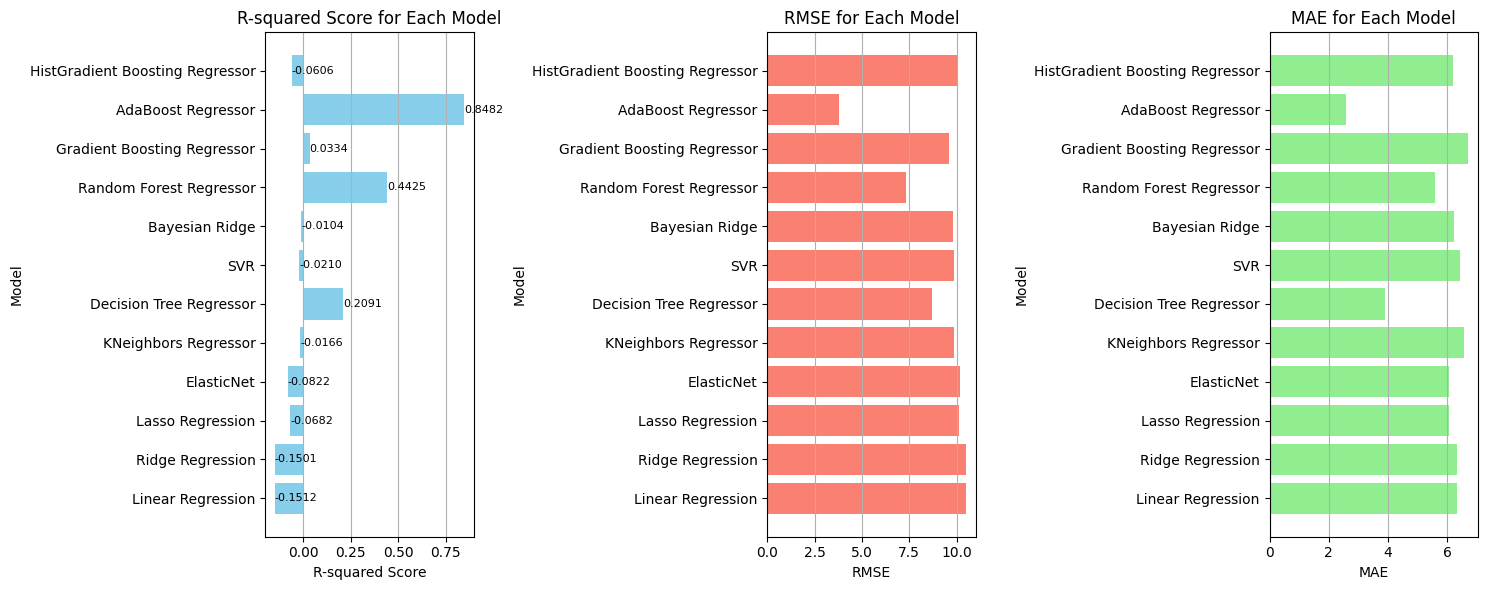

In [34]:
model_names = [name for name, _, _, _ in results]
r2_scores = [r2 for _, r2, _, _ in results]
rmse_values = [rmse for _, _, rmse, _ in results]
mae_values = [mae for _, _, _, mae in results]

# Plot metrics side by side for each model
plt.figure(figsize=(15, 6))

# Plot R-squared scores
"""
plt.subplot(1, 3, 1)
plt.barh(model_names, r2_scores, color='skyblue')
plt.xlabel('R-squared Score')
plt.ylabel('Model')
plt.title('R-squared Score for Each Model')
plt.grid(axis='x')
"""

# Plot R-squared scores
plt.subplot(1, 3, 1)
bars = plt.barh(model_names, r2_scores, color='skyblue')
plt.xlabel('R-squared Score')
plt.ylabel('Model')
plt.title('R-squared Score for Each Model')
plt.grid(axis='x')

# Annotate bars with exact values
for bar, score in zip(bars, r2_scores):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{score:.4f}',
             va='center', ha='left', fontsize=8)






# Plot RMSE values
plt.subplot(1, 3, 2)
plt.barh(model_names, rmse_values, color='salmon')
plt.xlabel('RMSE')
plt.ylabel('Model')
plt.title('RMSE for Each Model')
plt.grid(axis='x')

# Plot MAE values
plt.subplot(1, 3, 3)
plt.barh(model_names, mae_values, color='lightgreen')
plt.xlabel('MAE')
plt.ylabel('Model')
plt.title('MAE for Each Model')
plt.grid(axis='x')

plt.tight_layout()
plt.savefig("R2_RMSE_MAE.jpg")
plt.show()

# Now print the results for decision tree, random forest and ada boost

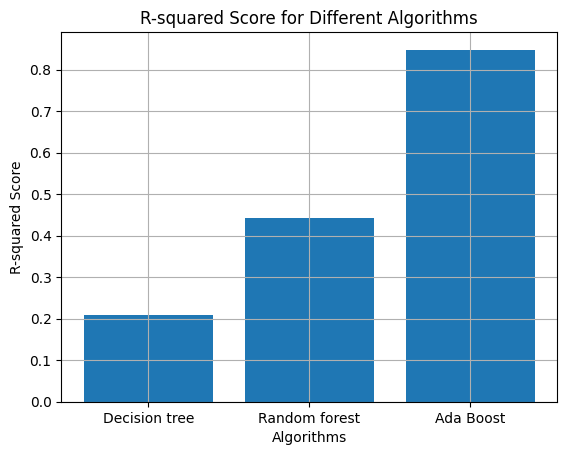

In [43]:
algo_names = ["Decision tree", "Random forest", "Ada Boost"]
r2_values = [0.2091, 0.4425, 0.8482]
plt.bar(algo_names, r2_values)
plt.xlabel('Algorithms')
plt.ylabel('R-squared Score')
plt.title('R-squared Score for Different Algorithms')
plt.grid(True)
plt.savefig("R2_algo.jpg")
plt.show()

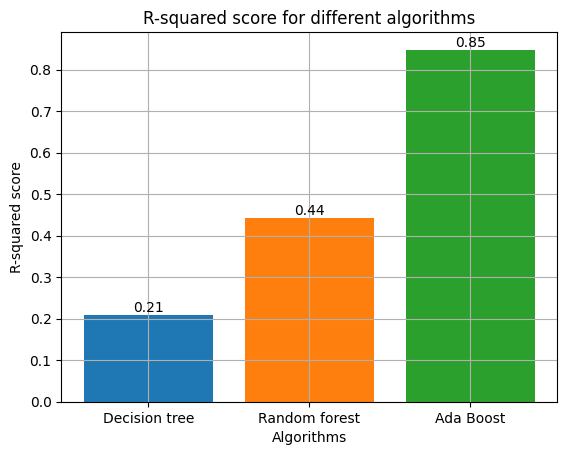

In [62]:


import matplotlib.pyplot as plt

algo_names = ["Decision tree", "Random forest", "Ada Boost"]
r2_values = [0.2091, 0.4425, 0.8482]

# Define a list of colors for each bar
bar_colors = ['tab:blue', 'tab:orange', 'tab:green']

# Create the bar chart with specified colors
plt.bar(algo_names, r2_values, color=bar_colors)
plt.xlabel('Algorithms')
plt.ylabel('R-squared score')
plt.title('R-squared score for different algorithms')
plt.grid(True)

# Add data labels above each bar
for i, value in enumerate(r2_values):
    plt.text(i, value, str(round(value, 2)), ha='center', va='bottom')

plt.savefig("R2_algo_colored.jpg")
plt.show()


# root mean square error

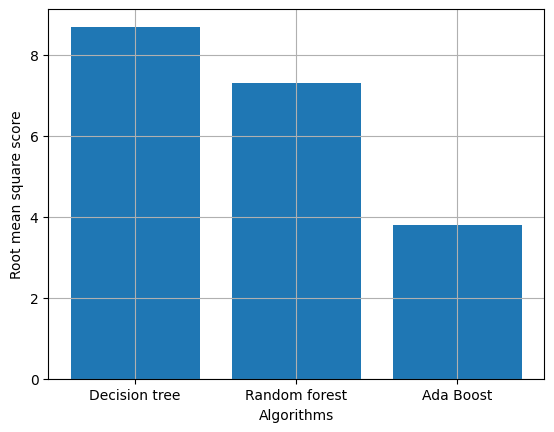

In [52]:
algo_names = ["Decision tree", "Random forest", "Ada Boost"]
r2_values = [8.6995, 7.3041, 3.8106]
plt.bar(algo_names, r2_values)
plt.xlabel('Algorithms')
plt.ylabel('Root mean square score')
#plt.title('R-squared Score for Different Algorithms')
plt.grid(True)
plt.savefig("RMSE_algo.jpg")
plt.show()

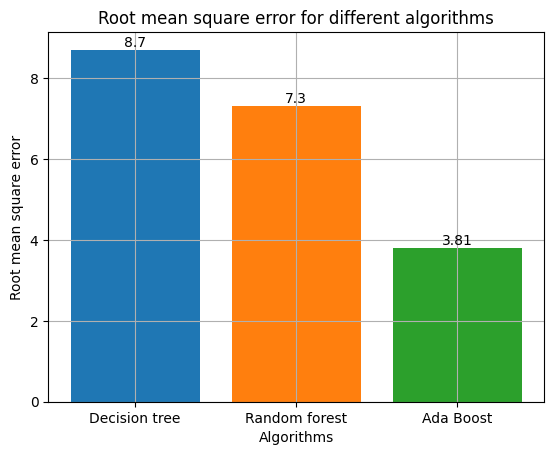

In [63]:


import matplotlib.pyplot as plt
algo_names = ["Decision tree", "Random forest", "Ada Boost"]
r2_values = [8.6995, 7.3041, 3.8106]

# Define a list of colors for each bar
bar_colors = ['tab:blue', 'tab:orange', 'tab:green']

# Create the bar chart with specified colors
plt.bar(algo_names, r2_values, color=bar_colors)
plt.xlabel('Algorithms')
plt.ylabel('Root mean square error')
plt.title('Root mean square error for different algorithms')

plt.grid(True)

# Add data labels above each bar
for i, value in enumerate(r2_values):
    plt.text(i, value, str(round(value, 2)), ha='center', va='bottom')

plt.savefig("RMSE_algo_colored.jpg")
plt.show()


# Mean absolute error

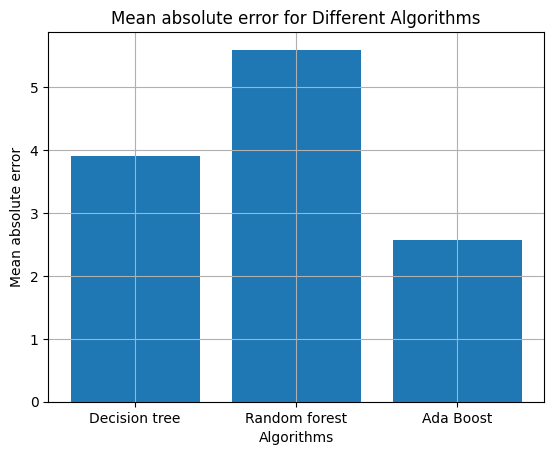

In [49]:
algo_names = ["Decision tree", "Random forest", "Ada Boost"]
r2_values = [3.9091, 5.5966,  2.5697]
plt.bar(algo_names, r2_values)
plt.xlabel('Algorithms')
plt.ylabel('Mean absolute error')
plt.title('Mean absolute error for Different Algorithms')
plt.grid(True)
plt.savefig("MAE_algo.jpg")
plt.show()

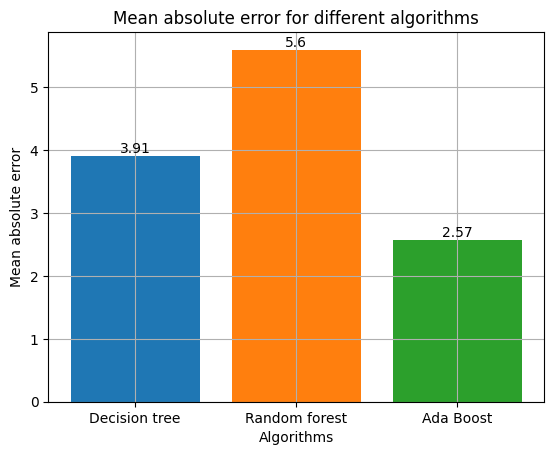

In [64]:

import matplotlib.pyplot as plt
algo_names = ["Decision tree", "Random forest", "Ada Boost"]
r2_values = [3.9091, 5.5966,  2.5697]

# Define a list of colors for each bar
bar_colors = ['tab:blue', 'tab:orange', 'tab:green']

# Create the bar chart with specified colors
plt.bar(algo_names, r2_values, color=bar_colors)
plt.xlabel('Algorithms')
plt.ylabel('Mean absolute error')
plt.title('Mean absolute error for different algorithms')
plt.grid(True)

# Add data labels above each bar
for i, value in enumerate(r2_values):
    plt.text(i, value, str(round(value, 2)), ha='center', va='bottom')

plt.savefig("MAE_algo_colored.jpg")
plt.show()
